<a href="https://colab.research.google.com/github/dnhshl/cc-ai/blob/main/obstsalat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -Uqq fastai duckduckgo_search
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *


In [4]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [18]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('orange fruit photos', max_images=3)
urls

Searching for 'orange fruit photos'


(#3) ['https://www.rd.com/wp-content/uploads/2017/12/01_oranges_Finally%E2%80%94Here%E2%80%99s-Which-%E2%80%9COrange%E2%80%9D-Came-First-the-Color-or-the-Fruit_691064353_Lucky-Business.jpg','http://images6.fanpop.com/image/photos/34500000/Orange-Fruit-orange-34512931-1620-1080.jpg','http://3.bp.blogspot.com/-tVoQ9O2IU_E/UDzWrWgr2TI/AAAAAAAAIZ8/ojl3vvQ-XV8/s1600/Orange+Fruits+Wallpapers+1.jpg']

In [20]:
def download_imgs(urls, path=".", name="image"):
  p = Path(path)
  for i in range(len(urls)):
      filename = f'{name}_{i}.jpg'
      dest = p/filename
      download_url(urls[i], dest, show_progress=False)

In [21]:
download_imgs(urls, name='orange')

In [7]:
def show_images(images, path='.'):
  p = Path(path)
  for image in images:
      plt.imshow(Image.open(p/image).to_thumb(256,256))
      plt.title(image)
      plt.show()

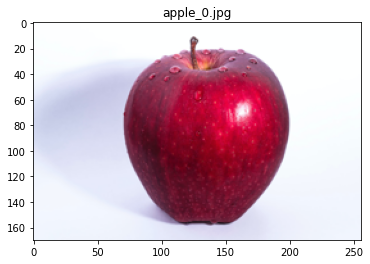

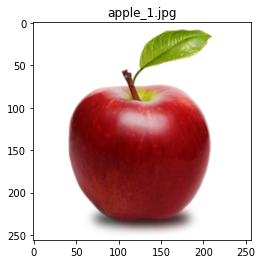

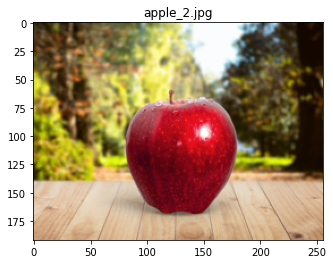

In [8]:
images = ['apple_' + str(i)+ '.jpg' for i in range(3)]
show_images(images)

In [9]:
classes = 'apple','orange', 'banana'
path = Path('fruits')

for fruit in classes:
    dest = path/fruit
    dest.mkdir(exist_ok=True, parents=True)
    # download_images() ist eine LIbrary Funktion, die parallele Prozesse
    # für den Download anstößt und die Bilder unter einen Zufallsnamen
    # speichert
    print(f'downloading {fruit} photos')
    urls = search_images(f'{fruit} fruit photo', max_images=50)
    download_images(dest, urls=urls)
    print(f'resizing ...')
    resize_images(dest, max_size=400, dest=dest)


downloading apple photos
Searching for 'apple photo'
resizing ...


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


downloading orange photos
Searching for 'orange photo'
resizing ...
downloading banana photos
Searching for 'banana photo'
resizing ...


In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

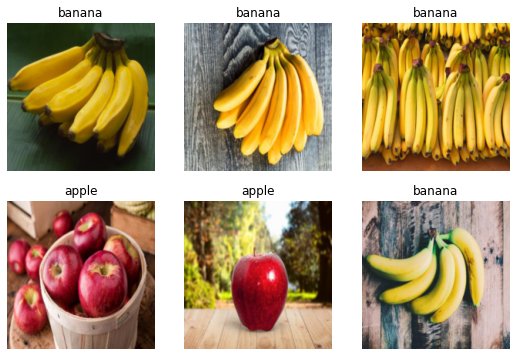

In [12]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.185379,0.501168,0.214286,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.863590,0.050544,0.000000,00:01
1,0.509536,0.006382,0.000000,00:01
2,0.368594,0.005326,0.000000,00:01


This is a: orange.
Probability it's orange: 0.0785


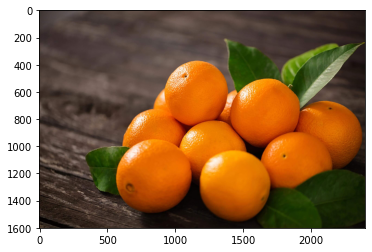

This is a: orange.
Probability it's orange: 0.0002


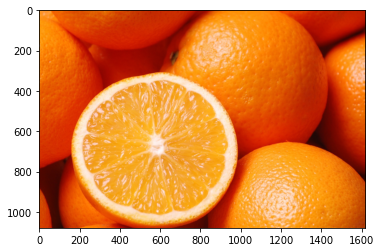

This is a: orange.
Probability it's orange: 0.0001


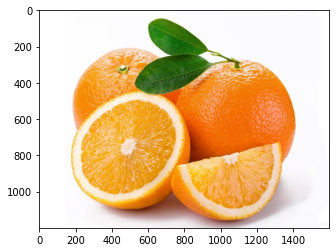

In [22]:
for i in range(3):
    im = f'orange_{i}.jpg'
    is_fruit,_,probs = learn.predict(im)
    print(f"This is a: {is_fruit}.")
    print(f"Probability it's {is_fruit}: {probs[0]:.4f}")
    plt.imshow(Image.open(im))
    plt.show()
    